In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from nltk.tokenize import TweetTokenizer
from collections import Counter

from sklearn.metrics import accuracy_score, classification_report

In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm


torch.manual_seed(42)

# Data Preprocessing and Augmentation

## data1

In [3]:
data1 = pd.read_csv("/kaggle/input/hate-speech-detection-curated-dataset/HateSpeechDataset.csv")
data1.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [4]:
data1["Label"].value_counts()

Label
0        361594
1         79305
Label         7
Name: count, dtype: int64

<Axes: ylabel='count'>

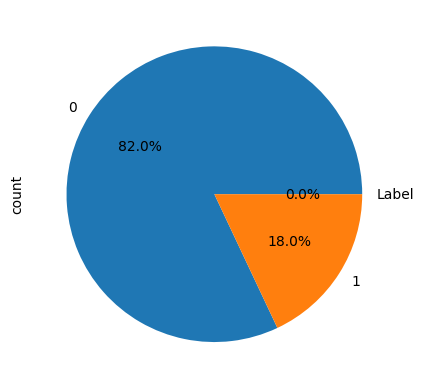

In [5]:
data1["Label"].value_counts().plot(kind="pie", autopct='%1.1f%%')

In [6]:
data1 = data1[data1["Label"] == "0"]

In [7]:
data1["Label"].value_counts()

Label
0    361594
Name: count, dtype: int64

In [8]:
data1 = data1.drop(["Content_int"], axis=1)
data1 = data1.rename(columns={"Content" : "Text"})
data1["Label"] = data1["Label"].astype(int)
data1.drop_duplicates("Text", inplace=True)

In [9]:
data1

,Text,Label
523,simply copy and paste the following text into ...,0
524,in order to help increase the booklets downloa...,0
525,as of the booklet had been downloaded over tim...,0
527,click on the download my bad green banner link,0
528,booklet updated on,0
...,...,...
440900,honestly that is ridiculous in my opinion,0
440902,i why do not you debate first before starting ...,0
440903,removal of i reverted the removal of the above...,0
440904,i have unblocked you eddie as i discussed on u...,0


## data2

In [10]:
data2 = pd.read_csv("/kaggle/input/hatetweetdetection/racism_data .csv")
data2.head()

,Unnamed: 0,text,label
0,4,â€œEVERYbody calling you Nigger now!â€ https:...,1
1,6,@WhiteHouse @realDonaldTrump Fuck ice. White s...,1
2,13,Who dafuqq is this nigga https://t.co/D6YwVyGjNZ,1
3,14,bf: move your bighead ðŸ˜…ðŸ˜‚ gf: NIGGA WHAT...,1
4,44,SHOOKY A NIGGA NOW yâ€™all mightâ€™ve did sumn...,1


In [11]:
data2["label"].value_counts()

label
1    5727
Name: count, dtype: int64

In [12]:
data2= data2.drop("Unnamed: 0", axis=1)
data2 = data2.rename(columns={"text":"Text", "label":"Label"})
data2["Label"] = data2["Label"].astype(int)
data2.drop_duplicates("Text", inplace=True)

In [13]:
data2

,Text,Label
0,â€œEVERYbody calling you Nigger now!â€ https:...,1
1,@WhiteHouse @realDonaldTrump Fuck ice. White s...,1
2,Who dafuqq is this nigga https://t.co/D6YwVyGjNZ,1
3,bf: move your bighead ðŸ˜…ðŸ˜‚ gf: NIGGA WHAT...,1
4,SHOOKY A NIGGA NOW yâ€™all mightâ€™ve did sumn...,1
...,...,...
5722,@edfloo Really nigga? https://t.co/leeh3Q7yCN,1
5723,ðŸ¥µðŸ¥µ tongue out &amp; fuck that nigga in t...,1
5724,A nigga get hurt like this make me wanna stop ...,1
5725,@ilovetreguapo get it together nigga https://t...,1


## data3

In [14]:
data3 = pd.read_csv("/kaggle/input/hatetweetdetection/xeno.csv")
data3

,Unnamed: 0,Text,xenophobia
0,3,A lot of foreigners seem to be catching COVID1...,True
1,5,"All things considered, if we're going to get i...",True
2,9,These are not migrants. These are invaders. Th...,True
3,10,"In typical Italian fashion, Italy immediately ...",True
4,11,âI canât think of anything worse than snog...,True
...,...,...,...
3419,5678,Country needs moderate on legal immigration bu...,True
3420,5679,What you need is moderate on legal immigration...,True
3421,5681,"Concerned about the heath of Floridians, the G...",True
3422,5684,We buried our first death last week. \nDirect...,True


In [15]:
data3["xenophobia"].value_counts()

xenophobia
True    3424
Name: count, dtype: int64

In [16]:
data3 = data3.drop("Unnamed: 0", axis=1)
data3["xenophobia"] = data3["xenophobia"].apply(lambda x: 2 if True else 0)
data3 = data3.rename(columns={"xenophobia":"Label"})
data3["Label"] = data3["Label"].astype(int)
data3.drop_duplicates("Text", inplace=True)

In [17]:
data3

,Text,Label
0,A lot of foreigners seem to be catching COVID1...,2
1,"All things considered, if we're going to get i...",2
2,These are not migrants. These are invaders. Th...,2
3,"In typical Italian fashion, Italy immediately ...",2
4,âI canât think of anything worse than snog...,2
...,...,...
3419,Country needs moderate on legal immigration bu...,2
3420,What you need is moderate on legal immigration...,2
3421,"Concerned about the heath of Floridians, the G...",2
3422,We buried our first death last week. \nDirect...,2


## data

In [18]:
def shuffling(df):
    return df.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
def sampling(df, n=10000, replace=True):
    return df.sample(n, replace=replace, random_state=42)

In [20]:
def get_samples(df, idx=[10001, 11001, 12001]):
    df = shuffling(df)
    return df[:idx[0]], df[idx[0]:idx[1]], df[idx[1]:idx[2]]

'''
Purpose: This function "get_samples" is used to split a dataframe df into three parts:
training, evaluation, and test sets.
This function is particularly useful when the original dataframe contains a large number of samples,
and we need to select a specific number of samples for each set. 
It shuffles the dataframe to ensure randomness and then splits it into three parts based on the provided indices.
These indices determine the boundaries for the training, evaluation, and test sets.
'''

In [21]:
def split_dataframe(df):
    train_df, test_df = train_test_split(df, train_size=0.9, stratify=df["Label"], random_state=42)
    train_df, eval_df = train_test_split(train_df, train_size=0.9, stratify=train_df["Label"], random_state=42)
    return train_df, eval_df, test_df


'''
Purpose: This function "split_dataframe" is employed to
split a dataframe df into training, evaluation, and test sets using stratified sampling. 
This function is suitable when the original dataframe contains a moderate or small number of samples, and we want to ensure that
each set maintains the same class distribution as the original dataset. 
It splits the dataframe into training and test sets, 
then further splits the training set into training and evaluation sets. 
This ensures that all three sets have a similar distribution of labels, facilitating unbiased model evaluation and comparison.
'''

In [22]:
def create_train(df1, df2, df3, n=10000):
    return concat_dataframes(sampling(df1, n, replace=False), sampling(df2, n, replace=True), sampling(df3, n, replace=True))


'''
Purpose: This function "create_train" is responsible for creating a balanced training dataset
by sampling from three input dataframes (df1, df2, df3) with replacement.
Since df1 contains more than n samples, replace=False ensures that each sample is unique.
However, df2 and df3 contain fewer than n samples,
so replace=True allows for the repetition of samples to ensure balance and an adequate number of samples for training.
The resulting training dataframe comprises
concatenated and shuffled entries from the three input dataframes, ready for use in model training.
'''

In [23]:
def concat_dataframes(df1, df2, df3):
    df = pd.concat([df1, df2, df3], ignore_index=True)
    return shuffling(df)

In [24]:
def split_to_X_y(df):
    return df["Text"], df["Label"]

In [25]:
# Split data1 into training, evaluation, and test sets
data1_train, data1_eval, data1_test = get_samples(data1)
# Split data2 and data3 into training, evaluation, and test sets
data2_train, data2_eval, data2_test = split_dataframe(data2)
data3_train, data3_eval, data3_test = split_dataframe(data3)

In [26]:
# Create combined training
train_df = create_train(data1_train, data2_train, data3_train)
# Create combined evaluation and test sets
eval_df = concat_dataframes(data1_eval, data2_eval , data3_eval)
test_df = concat_dataframes(data1_test, data2_test, data3_test)

<Axes: ylabel='count'>

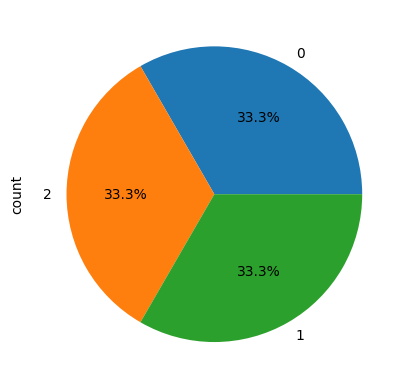

In [27]:
train_df["Label"].value_counts().plot(kind="pie", autopct='%1.1f%%')

## splitting data

In [28]:
# Split combined datasets into features (X) and labels (y)
X_train, y_train = split_to_X_y(train_df)
X_eval, y_eval = split_to_X_y(eval_df)
X_test, y_test = split_to_X_y(test_df)

In [29]:
y_train.value_counts()

Label
0    10000
2    10000
1    10000
Name: count, dtype: int64

In [30]:
y_eval.value_counts()

Label
0    1000
1     516
2     303
Name: count, dtype: int64

In [31]:
y_test.value_counts()

Label
0    1000
1     573
2     336
Name: count, dtype: int64

# Vocabulary

In [32]:
class Vocabulary:
    def __init__(self, freq_threshold, max_size):
        self.itos = {0: '<PAD>', 1: '<SOS>', 2: '<EOS>', 3: '<UNK>'}
        self.stoi = {k: j for j, k in self.itos.items()}
        self.freq_threshold = freq_threshold
        self.max_size = max_size
        self.tokenizer = TweetTokenizer()

    def __len__(self):
        return len(self.itos)

    def build_vocabulary(self, texts):
        frequencies = Counter()
        for text in texts:
            frequencies.update(self.tokenizer.tokenize(text))

        frequencies = {k: v for k, v in frequencies.items() if v > self.freq_threshold}
        frequencies = dict(sorted(frequencies.items(), key=lambda x: -x[1])[:self.max_size - 4])

        idx = 4
        for word in frequencies:
            self.stoi[word] = idx
            self.itos[idx] = word
            idx += 1
            
    def get_vocabularies(self):
        return self.itos

    def numericalize(self, text):
        tokenized_text = self.tokenizer.tokenize(text)
        numericalized_text = [self.stoi.get(token, self.stoi['<UNK>']) for token in tokenized_text]
        return numericalized_text
    
vocab = Vocabulary(freq_threshold=5, max_size=1000)
vocab.build_vocabulary(X_train)

# TextDataset

In [33]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_length=100):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]

        numericalized_text = self.vocab.numericalize(text)
        # Pad sequences to max_length
        if len(numericalized_text) < self.max_length:
            numericalized_text = numericalized_text + [0] * (self.max_length - len(numericalized_text))
        else:
            numericalized_text = numericalized_text[:self.max_length]
            
        return torch.tensor(numericalized_text), torch.tensor(label)
    
    
train_dataset = TextDataset(X_train, y_train, vocab)
eval_dataset = TextDataset(X_eval, y_eval, vocab)
test_dataset = TextDataset(X_test, y_test, vocab)

In [34]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model

In [35]:
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx, num_layers):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, 
                            bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim // 2)
        self.fc2 = nn.Linear(hidden_dim // 2, output_dim)
        self.relu = nn.ReLU()

    def forward(self, text):
        embedded = self.embedding(text)
        _, (hidden, _) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        out = self.fc1(hidden)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [36]:
def train(model, criterion, optmizer, dataloader):
    cost = 0
    model.train()
    
    for X, y in dataloader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        pred = model(X).squeeze(1)
        loss = criterion(pred, y)
        cost += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return cost/len(dataloader)

In [37]:
def evaluation(model, criterion, dataloader):
    cost = 0
    labels, pred_labels = [], []
    model.eval()
    
    for X, y in dataloader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        with torch.no_grad():
            pred = model(X)
            loss = criterion(pred, y)
            cost += loss.item()
            _, predicted = torch.max(pred, 1)
            labels.extend(y.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())
                
    return cost / len(dataloader), accuracy_score(labels, pred_labels), classification_report(labels, pred_labels)

In [38]:
def run(model, criterion, optimizer, train_dataloader, eval_dataloader):
    history = {
        "train_loss":[],
        "eval_loss":[],
        "accuracy":[]
    }
    for _ in tqdm(range(EPOCHS)):
        train_loss = train(model, criterion, optimizer, train_dataloader)
        eval_loss, accuracy, _ = evaluation(model, criterion, eval_dataloader)
        history["train_loss"].append(train_loss)
        history["eval_loss"].append(eval_loss)
        history["accuracy"].append(accuracy)
    return history

In [39]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    x_axis = range(1, EPOCHS+1)
    ax1.plot(x_axis, history["train_loss"], label="Train Loss")
    ax1.plot(x_axis, history["eval_loss"], label="Eval Loss")
    ax2.plot(x_axis, history["accuracy"], label="Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show();

In [40]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
EPOCHS = 15

vocab_size = len(vocab)
embedding_dim = 8
hidden_dim = 16
output_dim = 3
pad_idx = vocab.stoi['<PAD>']
num_layers = 2

model = TextClassificationModel(vocab_size, embedding_dim, hidden_dim, output_dim, pad_idx, num_layers).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

history = run(model, criterion, optimizer, train_dataloader, eval_dataloader)

100%|██████████| 15/15 [05:59<00:00, 23.96s/it]


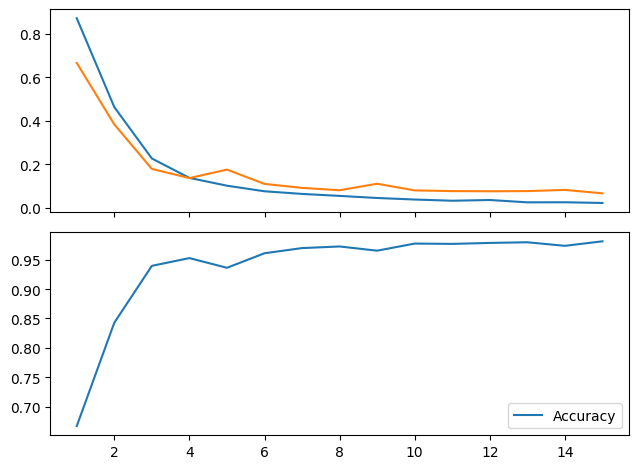

In [41]:
plot_history(history)

In [42]:
torch.save(model, "model.pth")

# final result (on totally unseen data)

In [43]:
_, _, report = evaluation(model, criterion, test_dataloader)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1000
           1       0.98      0.94      0.96       573
           2       0.98      0.99      0.98       336

    accuracy                           0.98      1909
   macro avg       0.98      0.97      0.98      1909
weighted avg       0.98      0.98      0.98      1909

